# Дисперсионный анализ. Корреляционный анализ

Сперва напомним что такое статистический критерий - это правило, обеспечивающее принятие истинной и отклонение ложной гипотезы с заданной вероятностью.

По сути это функция $f: \mathcal{D} → \mathbb{R}$, где $\mathcal{D}$ - некоторые данные, $\mathbb{R}$ - множество действительных чисел, при этом ноль принадлежит области значений этой функции: $0 ∈ ran f$.

**Область принятия гипотезы (ОПГ)** - подмножество таких значений критерия, при которых основная гипотеза не может быть отвергнута. Область принятия гипотезы всегда включает в себя значение 0.

**Критическая область** - подмножество таких значений критерия, при которых основная гипотеза не может быть принята.

Пример - значение t-критерия выполняется по формуле:

$$
\begin{vmatrix}
\frac{μ - μ_0}{σ / \sqrt{N}}
\end{vmatrix} ≤ t_{(α, ν)}
$$

Так-как сатистика критерия (т.е. значение функции) - случайная величина, то и область принятия гипотезы определяется как случайная величина. К примеру критические значения t-критерия находятся из распределения Стьюдента. С помощью вичислений или с помощью таблиц. Приведем примеры нахождения критических значений t-критерия Стьюдента: 

**Квантиль** — значение, которое заданная случайная величина не превышает с фиксированной вероятностью.

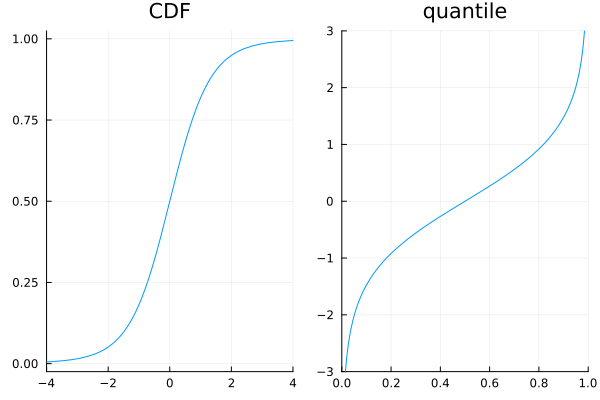

In [4]:
using Plots, Distributions
dist = TDist(5)
plot(
    plot(x-> cdf(dist, x), legend = false, xlims = (-4,4)), 
    plot(x-> quantile(dist, x), legend = false, xlims = (0,1), ylims = (-3, 3)), 
    layout = 2, title=["CDF" "quantile"])

In [1]:
using Distributions
α = 0.05
dist = TDist(5)

l = quantile(dist, α/2)
u = quantile(dist, 1-α/2)
println("Критические значения", l, " и ", u)

Критические значения-2.5705818356363146 и 2.5705818356363137


In [9]:
quantile(TDist(65), 1-.05/2)

1.9971379083920036

Таблица для **двухсторонних** значений t-критерия Стьюдента

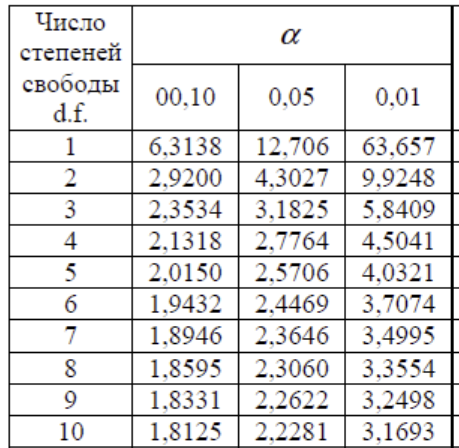

Число степеней свободы вычисляется по определенным правилам и обычно равно: $n - 1$ для одовыборочного теста,  $n_1 + n_2 - 2$ - для t-критерия для независимых групп.

Давайте применим это правило для тестирования следующей гипотезы: 

$H_0:$ среднее значение по выборке равно 5 $μ = 5$ 

$H_A:$ среднее значение по выборке не равно 5 $μ ≠ 5$ 

Пусть даны данные: $[5,6,3,9,7,7]$

Для этой выборки: $μ = 6.17$ и $σ = 2.04$

Напомним $μ$ - это среднее арифметическое, $σ$ - стандартное отклонение.

Используя формулу:

$$
\begin{vmatrix}
\frac{μ - μ_0}{σ / \sqrt{N}}
\end{vmatrix} ≤ t_{(α, ν)}
$$


Находим критиченское значение $t = 1.4$. Делаем выводы.


**В контексте дисперсионного анализа можно сказать, что t-критерий является частным случаем дисперсионного анализа.**

Математическая модель модет быть выражена так:

$x_i = μ + e_i$

где: $x_i$ - результат измерения $i$,  $μ$ - истинный результат, $e$ - случайная ошибка $i$-го измерения.

In [5]:
d = [5,6,3,9,7,7]
μ = mean(d)
μ₀ = 5
n = length(d)
σ = std(d)
println("μ: ", μ, " σ: ", σ)

t = abs((μ - μ₀)/(σ/sqrt(n)))
println("Значение критерия: ", t)
println("Стандартная ошибка среднео: ", σ/sqrt(n))


μ: 6.166666666666667 σ: 2.0412414523193148
Значение критерия: 1.4000000000000006
Стандартная ошибка среднео: 0.8333333333333333


In [6]:
pval = 1 - cdf(dist, t) + cdf(dist, -t)

0.22040387992934418

In [4]:
using HypothesisTests

OneSampleTTest(d, μ₀)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         5
    point estimate:          6.16667
    95% confidence interval: (4.025, 8.309)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.2204

Details:
    number of observations:   6
    t-statistic:              1.4000000000000006
    degrees of freedom:       5
    empirical standard error: 0.8333333333333333


## Дисперсионный анализ

**Сущность дисперсионного анализа**

Дисперсионный анализ – это статистический метод анализа результатов
наблюдений, зависящих от различных одновременно действующих факторов. Может применяться для выбора
наиболее важных факторов и оценки их влияния.

Идея дисперсионного анализа заключается в разложении общей дисперсии
случайной величины на независимые случайные слагаемые, каждое из которых
характеризует влияние того или иного фактора или их взаимодействия.
Последующее сравнение этих дисперсий позволяет оценить существенность
влияния факторов на исследуемую величину.

Если исследуется влияние одного фактора на исследуемую величину, то речь
идет об однофакторном комплексе. Если изучается влияние двух факторов –
двухфакторный комплекс. И т.д.

**Исходными положениями дисперсионного анализа являются:**

* Нормальное распределение значений изучаемого признака в генеральной совокупности;


* Количественный непрерывный тип данных, дискретные данные менее желательны;


* Равенство дисперсий в сравниваемых генеральных совокупностях;


* Случайный и независимый характер выборки.



**Гипотеза**

Нулевой гипотезой в дисперсионном анализе является утверждение о равенстве средних значений (несмотря на то, что анализ называется "дисперсионным"):


* $H_{0}{:}\quad \mu _{1}=\mu _{2}=\dots =\mu _{j}$


* $H_{A}{:} \quad \exists \; i,j\in \{1,...,j\},i\neq j:\mu _{i}\neq \mu _{j}$

При отклонении нулевой гипотезы принимается альтернативная гипотеза о том, что не все средние равны, то есть имеются, по крайней мере, две группы, отличающиеся средними значениями.

**Однофакторный дисперсионный анализ**


Возможен случай, когда в эксперименте одновременно изучаются несколько уровней фактора. 
В качестве примера можно представит: применение разных лекарственных средств для лечения заболевания, 
использование разных кормов для животных, применение разных инструментов для обработки деталей.

Важно что бы воздействие фактором было одиночным и не зависело от других факторов. Иногда можно представит ситуацию когда 
практически на результат влияют несколько факторов, к примеру "препарат" и "режим", но в связи с тем, что комбинации - непересекающиеся, то можно считать это одним фактором.  Интерпретация в таком случае должа 
учитывать, что такой комплексный фактор влияет безразрывно и не раскладывается на составляющие.

Таким образом, мы изучаем - влияет ли выделенный (многоуровневый) фактор на результат. Ответ на этот вопрос можно получить, сравнивая средние значения измерений полученных под влиянием каждого из факторов между собой с последующей оценкой существенности разницы этих средних.


**Уровни фактора**

Любой фактор исследуется в котексте уровней этого фактора, т.е. - отдельных взаимоисключающих событий. Т.е. фактор называется "Пол", уровни фактора: "мужской", "женский". 

Уровней фактора может быть практически любое количество.  

К примеру: фактор - "Цвет", уровни: "красный", "фиолетовый", "синий", "зеленый", "черный".

Уровни фактора должны быть уровни из одного множества взаимоисключающих характеристик - т.е. вызывает сомнение осмысленность уровней одного фактора: "синий", "белый", "твердый".

**Математическая модель дисперсионного анализа представляет собой частный случай основной линейной модели.**

$x_{i,j}=\mu_{i}+a_{i,j}+e_{i,j}$,

где:

* $x_{i , j} $ — результат  $i$-го измерения в группе  $A_{j}$ ($A_{j}$ - уровень $j$ фактора $A$);


* $\mu_{i}$ — точное значение $i$-го измерения;


* $a_{i,j}$ — систематическая ошибка  $i$-го измерения в группе $A_{j}$ (т.е. влияние уровня $A_{j}$);


* $e_{i,j}$ — случайная ошибка  $i$-го измерения в группе $A_{j}$.

Процедура дисперсионного анализа состоит в определении соотношения систематической **(межгрупповой)** дисперсии к случайной **(внутригрупповой)** дисперсии в измеряемых данных. 

В качестве показателя изменчивости используется сумма квадратов отклонения значений параметра от среднего: $SS$. 

Общая сумма квадратов $SS_{\textrm {total}}$  раскладывается на межгрупповую сумму квадратов $SS_{\textrm {B}}$ и внутригрупповую сумму квадратов $SS_{\textrm {W}}$:


$SS_{\textrm {total}} = SS_{\textrm {B}} + SS_{\textrm {W}}$ 


Пусть $E$ среднее значение генеральной совокупности, а $E_j$ среднее значение уровня $j$, тогда:


* $SS_{\textrm {total}}=\sum_{i=1}^{n_j}\sum_{j=1}^{J}(x_{i,j}-E)^{2}$


* $SS_{\textrm {B}}=\sum_{j=1}^{J}n_j(E_{j}-E)^{2}$ 


* $SS_{\textrm {W}}=\sum_{i=1}^{n_j}\sum_{j=1}^{J}(x_{i,j}-E_{j})^{2}$




**Степени свободы**

Степени свободы вычисляются следующим образом:

* $df_{\textrm {total}} =df_{\textrm {B}}+df_{\textrm {W}}$ 


* $df_{\textrm {total}}=N-1$


* $df_{\textrm {B}}=J-1$


* $df_{\textrm {W}}=N-J,$


Где и $N$ - объём полной выборки, а $J$ — количество уровней. 

Дисперсия каждой части называется - «средний квадрат»: $MS$ - т.е. отношение суммы квадратов к числу их степеней свободы:


* $MS_{\textrm {total}}={\frac {SS_{\textrm {total}}}{N-1}}$


* $MS_{\textrm {B}}={\frac {SS_{\textrm {B}}}{J-1}}$


* $MS_{\textrm {W}}={\frac {SS_{\textrm {W}}}{N-J}}$


Соотношение межгрупповой и внутригрупповой дисперсий имеет F-распределение (распределение Фишера) и определяется при помощи F-критерия Фишера:


$F_{df_{\textrm {B}},df_{\textrm {W}}}={\frac {MS_{\textrm {B}}}{MS_{\textrm {W}}}}$ 

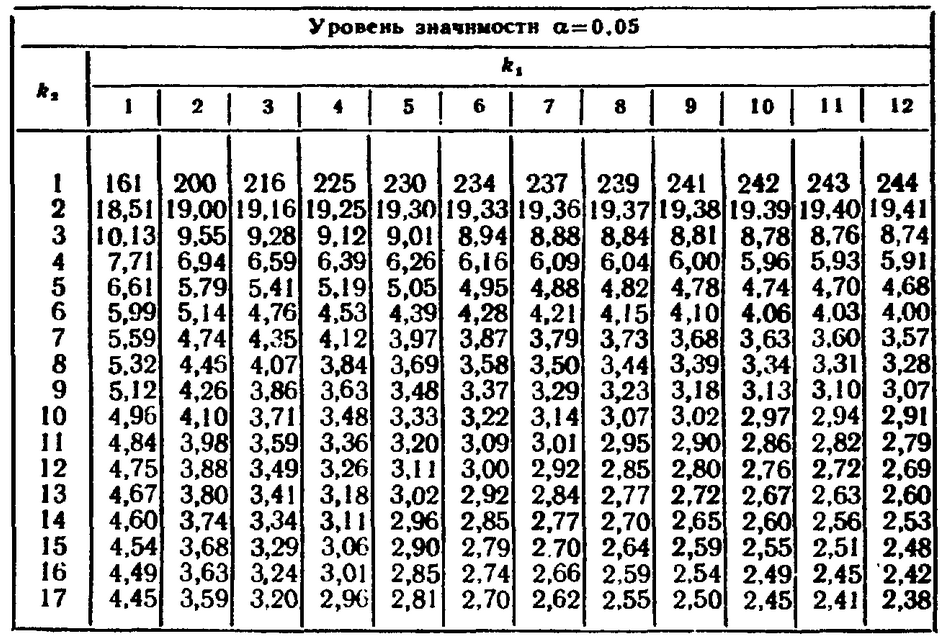

In [10]:
using Distributions
α = 0.05
dist = FDist(2, 5)
с = quantile(dist, 1-α)
println("Критическое значение ", с)

Критическое значение 5.786135043349965


In [12]:
v1 = [3,5,7,6,5,4]
v2 = [6,5,7,8,9,13]
v3 = [6,7,1,7,10,18]
#v1 = [1 3 2 1 0 2 1]'
#v2 = [2 3 2 1 4]'
#v3 = [4 5 3]'
v = vcat(v1, v2, v3)

Mean_Total = mean(v)
Mean_v1 = mean(v1)
Mean_v2 = mean(v2)
Mean_v3 = mean(v3)

SS_total = sum(x->x*x, v .- Mean_Total) 

SS_B     = length(v1)*(Mean_v1 - Mean_Total)^2  + length(v2)*(Mean_v2 - Mean_Total)^2 + length(v3)*(Mean_v3 - Mean_Total)^2

SS_W     = sum((v1 .- Mean_v1) .^2) + sum((v2 .- Mean_v2) .^2) + sum((v3 .- Mean_v3) .^2)
println("Mean_Total: ", Mean_Total, ", Mean_v1: ",Mean_v1,", Mean_v2: ",Mean_v2,", Mean_v3: ",Mean_v3)
println("SS_total: ", SS_total)
println("SS_B: ", SS_B)
println("SS_W: ", SS_W)
println("SS_B + SS_W = ", SS_B + SS_W)

Mean_Total: 7.055555555555555, Mean_v1: 5.0, Mean_v2: 8.0, Mean_v3: 8.166666666666666
SS_total: 246.94444444444446
SS_B: 38.1111111111111
SS_W: 208.83333333333331
SS_B + SS_W = 246.9444444444444


In [13]:
df_total = length(v) - 1
df_B     = 3 - 1
df_W     = length(v) - 3
println("df: ", df_B, " ",df_W)

df: 2 15


In [14]:
MS_total = SS_total / df_total
MS_B     = SS_B / df_B
MS_W     = SS_W / df_W

F_val =  MS_B / MS_W

dist = FDist(2, 15)

pval  = 1 - cdf(dist, F_val)

println("F-статистика: ", MS_B/MS_W)
println("p-value: ", pval)
с = quantile(dist, 1-α)
println("Критическое значение ", с)


F-статистика: 1.3687150837988824
p-value: 0.2844488635980029
Критическое значение 3.682320343673239


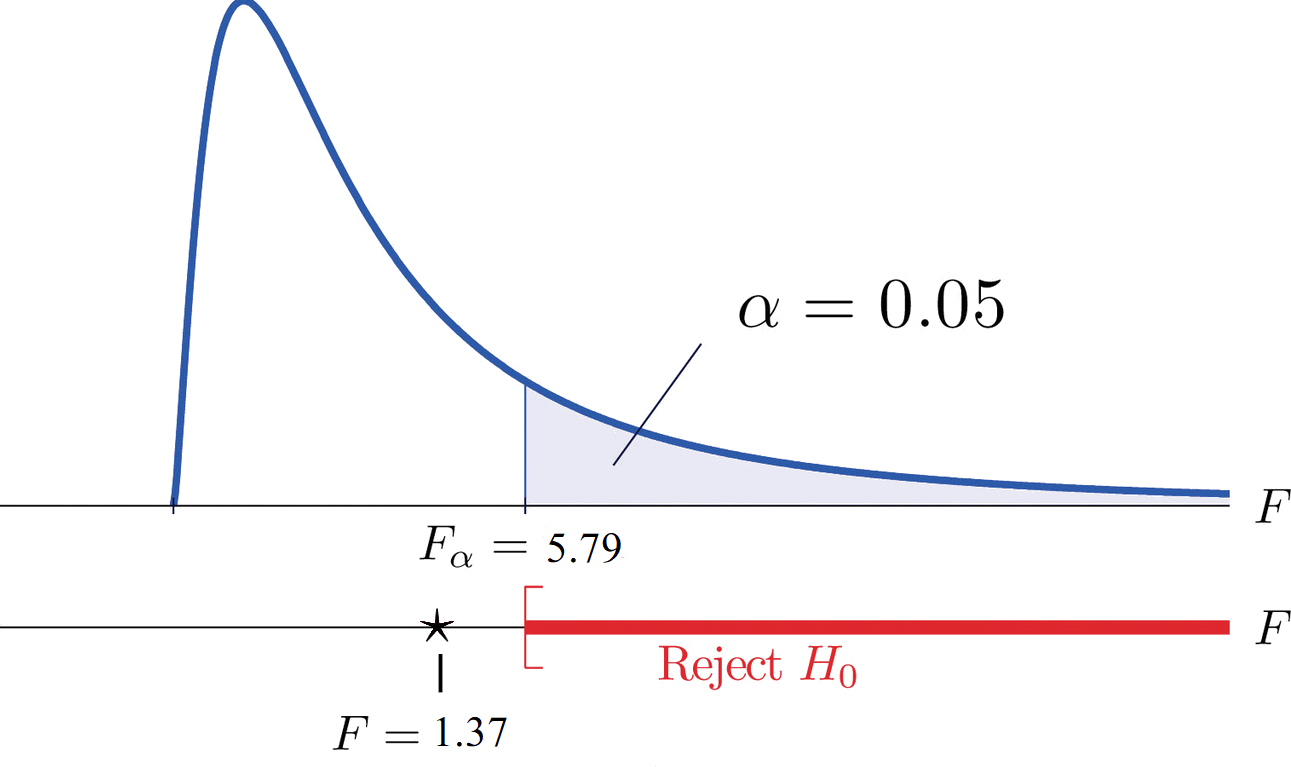

In [9]:
using HypothesisTests
OneWayANOVATest(v1, v2, v3)

One-way analysis of variance (ANOVA) test
-----------------------------------------
Population details:
    parameter of interest:   Means
    value under h_0:         "all equal"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.2844

Details:
    number of observations: [6, 6, 6]
    F statistic:            1.36872
    degrees of freedom:     (2, 15)


**Для подтверждения положения о равенстве дисперсий обычно применяется критерий Ливена (Ливиня)(Levene's test).**

**Апостериорные сравнения**

После того как мы оценили всю совокупность средних значений по группам общей оценкой значимости, мы можем поставить вопрос, какие группы отличаются уверенно, а какие нет. Для этого служат апостериорные сравнения: проводятся сравнения по Т-критерию каждой группы с каждой, но показываемая Т-критерием значимость умножается на зависящую от количества сравнений константу (коррекция ошибки первого рода). В результате скорректированные значимости могут интерпретироваться, как интерпретировались бы значимости при отдельных сравнениях, но без риска завысить результат вследствие большого числа сравнений. Существуют и другие подходы к апостериорному тестрованию.

## Многофакторный анализ

**Многофакторный анализ** позволяет проверить влияние нескольких факторов на зависимую переменную. Модель многофакторного анализа имеет вид:

$x_{{i,j,k}}=\mu _{{i}}+a_{{i,j}}+b_{{i,k}}+...+(ab)_{{i,j,k}}+e_{{i,j,k}}$, где:

* $x_{i,j,k}$ — результат $i$-го измерения;
* $\mu _{i}$ — среднее для $i$-го измерения;
* $a_{i,j}$ — систематическая ошибка  $i$-го измерения для уровня $j$ фактора $A$;
* $b_{i,k}$ — систематическая ошибка  $i$-го измерения для уровня $k$ фактора $B$;
* $(ab)_{i,j,k}$ — систематическая ошибка  $i$-го измерения для уровня $j,k$ комбинации факторов $A$ и $B$;
* $e_{i,j,k}$ — случайная ошибка $i$-го измерения.

В отличие от однофакторной модели, где имеется одна межгрупповая сумма квадратов, модель многофакторного анализа включает суммы квадратов для каждого фактора в отдельности и суммы квадратов всех взаимодействий между ними. 


В двухфакторной модели межгрупповая сумма квадратов раскладывается на сумму квадратов фактора $A$, сумму квадратов фактора $B$ и сумму квадратов взаимодействия факторов $A$ и $B$ (такое взаимодействие обычно обозначается: $A*B$):


$SS_{\textrm {total}}=SS_{Abtw}+SS_{Bbtw}+SS_{ABbtw}+SS_{\textrm {W}}$


Степени свободы раскладываются аналогичным образом:


* $df_{\textrm {total}}=df_{Abtw}+df_{Bbtw}+df_{ABbtw}+df_{\textrm {W}}$

где:


* $df_{\textrm {total}}=N-1$


* $df_{A}=J-1$


* $df_{B}=K-1$


* $df_{AB}=(J-1)(K-1)$


* $df_{\textrm {wg}}=N-JK$


Соответственно трёхфакторная модель включает сумму квадратов фактора $A$, сумму квадратов фактора $B$, сумму квадратов фактора $C$  и суммы квадратов взаимодействий факторов $A$ и $B$, $B$ и $C$, $A$ и $C$, а также взаимодействия всех трёх факторов $A$ , $B$ , $C$:


$SS_{\textrm {total}}=SS_{Abtw}+SS_{Bbtw}+SS_{Cbtw}+SS_{ABbtw}+SS_{BCbtw}+SS_{ACbtw}+SS_{ABCbtw}+SS_{\textrm {W}}$


**При анализе многих факторов рекомендуется использовать общую линейную модель.**

## Корреляционный анализ


**Парная корреляция**

Связи между различными явлениями в природе сложны и многообразны.
Однако их можно определенным способом классифицировать. В технике и
естествознании часто речь идет о функциональной зависимости между
переменными $X$ и $Y$, когда каждому значению $X$ поставлено в однозначное
соответствие определенного значения $Y$.


В реальном мире многие явления природы происходят в обстановке действия
многочисленных факторов, влияние каждого из которых ничтожно, а число этих
факторов велико. В этих случаях связь теряет свою строгую функциональность, и
изучаемая физическая система переходит не в определенное состояние, а в одно из
возможных. 

Здесь речь идет о стохастической связи. Частный случай
стохастической связи – статистическая связь. Об этой связи имеет смысл говорить,
когда условное математическое ожидание одной случайной переменной является
функцией значения, принимаемого другой случайной переменной.
Значения статистической зависимости между случайными переменными
имеет большое практическое значение. С ее помощью можно прогнозировать
зависимость случайной переменной, в предположении, что независимая принимает
определенное значение.



**Классификация**

* Форма

    - Линейная
    - Нелинейная

* Направление 

    - Прямая
    - Обратная
    
* Сила
    - Сильная
    - Слабая

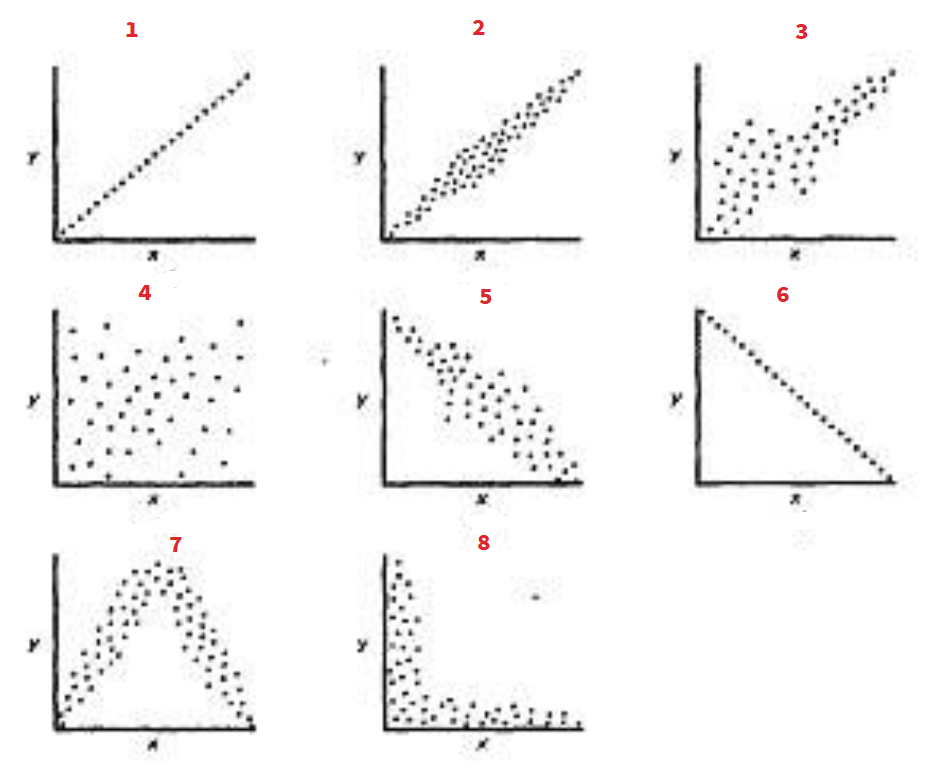

1. Линейная строгая прямая
2. Линейная прямая
3. Линейная мягкая прямая
4. Отсутствует
5. Линейная обратная 
6. Линейная обратная строгая
7. Нелинейная
8. Нелинейная


**Для любых коррелированных событий А и Б их отношения включают (причинно-следственная связь):**

1. A → B
2. B → A
3. C → A ∪ C → B
4. A ⬌ B

**Коэффициенты корреляции**

1. Для порядковых данных используются следующие коэффициенты корреляции:
* ρ - коэффициент ранговой корреляции Спирмена
* τ - коэффициент ранговой корреляции Кендалла
* γ - коэффициент ранговой корреляции Гудмена – Краскела


2. Для переменных с интервальной и номинальной шкалой используется коэффициент корреляции Пирсона (корреляция моментов произведений).


3. Если, по меньшей мере, одна из двух переменных имеет порядковую шкалу, либо не является нормально распределённой, используется ранговая корреляция Спирмана или τ-Кендалла. Применение коэффициента Кендалла предпочтительно, если в исходных данных имеются выбросы.

## Коэффициент корреляции Пирсона

**Коэффициент корреляции**

Важной характеристикой совместного распределения двух случайных величин является ковариация (или корреляционный момент). Ковариация определяется как математическое ожидание произведения отклонений случайных величин:


$\mathrm {cov}_{XY}=\mathbf {E} \left[(X-\mathbf {E} (X))(Y-\mathbf {E} (Y))\right]=\mathbf {E} (XY)-\mathbf {E} (X)\mathbf {E} (Y)$


где $\mathbf {E}$  — математическое ожидание. 




**Линейный коэффициент корреляции**

Для устранения недостатка ковариации был введён линейный коэффициент корреляции (или коэффициент корреляции Пирсона), который разработали Карл Пирсон, Фрэнсис Эджуорт и Рафаэль Уэлдон в 90-х годах XIX века. Коэффициент корреляции рассчитывается по формуле:


$\mathbf {r}_{XY}={\frac {\mathbf {cov}_{XY}}{\mathbf {\sigma }_{X}{\sigma }_{Y}}}={\frac {\sum (X-{\bar {X}})(Y-{\bar {Y}})}{\sqrt {\sum (X-{\bar {X}})^{2}\sum (Y-{\bar {Y}})^{2}}}}$

где ${\overline {X}}={\frac {1}{n}}\sum _{t=1}^{n}X_{t}$, ${\overline {Y}}={\frac {1}{n}}\sum _{t=1}^{n}Y_{t}$ — среднее значение выборок.

Коэффициент корреляции изменяется в пределах от минус единицы до плюс единицы

In [10]:
v1 = [1,4,3,4,5,6,5,6,7,8,7,8,9]
v2 = [3,4,2,3,4,5,6,7,6,9,8,9,10]

r_xy = cov(v1,v2)/std(v1)/std(v2)

using Statistics
r_xy_2 = Statistics.cor(v1, v2)

println("r метод 1: ", r_xy, ", r используя Statistics: ", r_xy_2)

r метод 1: 0.9093141848056545, r используя Statistics: 0.9093141848056547


**Домашнее задание:**

1. Вычислить среднее значение ($μ$) для вектора $[3,4,6,4,3]$

2. Вычислить выборочное стандартное отклонение ($σ$) для вектора $[3,7,3,1]$

3. Проверить гипотезу 

$H_0: μ = μ₀$ 

$H_A: μ ≠ μ₀$ 

При $μ₀ = 6$ и двухстороннем уровне значимости $α = 0.1$

Данные: $[10,5,4,11,8,9]$

4. Используя дисперсионный анализ протестировать гиптезу о равенстве средних:

$H_0: μ_1 = μ_2 = μ_3 = μ$ 

$H_A: μ ≠ μ_1 ∪ μ ≠ μ_2 ∪ μ ≠ μ_3$ 

При двухстороннем уровне значимости $α = 0.05$

Данные: $d_1 = [10,8,4,6,8]; d_2 = [8,5,3,10,6]; d_2 = [12,5,7,8,7]$

5. Найти корреляции Пирсона для векторов

a = [1,6,4,5,7,8,9,6,5]
b = [8,6,5,6,4,1,4,3,2]

6. Дать определения для

* ρ - коэффициент ранговой корреляции Спирмена
* τ - коэффициент ранговой корреляции Кендалла
* γ - коэффициент ранговой корреляции Гудмена – Краскела
